# Artificial Intelligence exam project

Initial imports:

In [1]:
import matplotlib.pyplot as plt
import IPython.display as display
from utils import *
from heuristic_FD import *

In [2]:
state = env.reset()
env.render() 
print(env.actions)


You are lucky!  Full moon tonight.                                              
                                                                                
                                                                                
                                                                                
                                ...............                                 
                                .).............                                 
                                ...............                                 
                                ...............                                 
                                ...............                                 
                                ...............                                 
                                ...............                                 
                                ...............                                 
                           

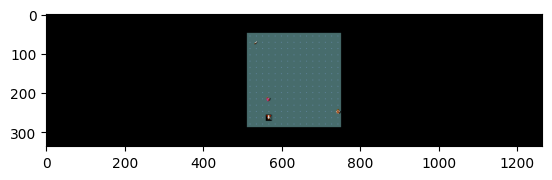

In [3]:
game_map = state['chars']
game = state['pixel']
plt.imshow(state['pixel'])

In [4]:
start = get_player_location(game_map)
end_target = get_target_location(game_map)
# weapon = get_weapon_location(game_map) 

print("Agent position:", start)
print("Target position:", end_target)
print("Monster position:", get_monster_location(game_map))
print("Weapon position:", get_weapon_location(game_map) )
print("Other actions:", OTHER_ACTIONS[8])
print("Other actions:", OTHER_ACTIONS[9])

Agent position: (15, 46)
Target position: (16, 35)
Monster position: [(13, 35)]
Weapon position: [(4, 33)]
Other actions: Command.PICKUP
Other actions: Command.WIELD


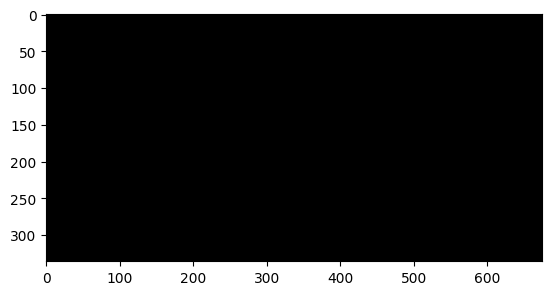

In [5]:
player_moves = [start]
image = plt.imshow(game[:, 300:975])

# finchè non arriviamo alla soluzione
end_state = False
weapons_in_inventory = 0
weapons_in_hand = 0
coord_weapons = get_weapon_location(game_map)

while not end_state:

    current_position = get_player_location(game_map)
    coord_monsters = get_monster_location(game_map)
    
    target = end_target
    
    #print("My position: ", current_position,
    #    ", Weapon position: ", get_weapon_location(game_map), 
    #    ", Weapons in inventory: ", weapons_in_inventory,
    #    ", Weapons in hand: ", weapons_in_hand)
    
    if weapons_in_inventory==0 and len(coord_weapons)!= 0 and current_position == coord_weapons[0]:
        pickup()
        weapons_in_inventory += 1
        #wield() #NOT WORKING
        # weapons_in_hand += 1
    
    if weapons_in_inventory==0 and len(coord_weapons)!=0 :
        target = coord_weapons[0]
    elif len(coord_monsters)!=0:
        target = coord_monsters[0]

    coord_weapons = get_weapon_location(game_map)
    
    moves = get_valid_moves(game_map,current_position) # lista mosse valide     
    coord = get_best_move(game_map, current_position, target, euclidean_distance)

    # stampa e aggiornamento passo
    game_map, _, end_state, _ = env.step(actions_from_path(current_position,[coord])[0])
    game_map = plot_map(game_map,image)
    
    player_moves.append(coord)
